In [69]:
print("Hello, R in Colab!")

[1] "Hello, R in Colab!"


In [70]:
# install.packages("dplyr")
# install.packages("wordcloud")
# install.packages("RColorBrewer")
# install.packages("tm")

In [71]:
library(wordcloud)
library(RColorBrewer)
library(tm)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [72]:
data <- read.csv("/content/file.csv")

In [73]:
head(data)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
,<int>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,288942,#1 Piano Hand Coordination: Play 10th Ballad in Eb Key songs,TRUE,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
2,1170074,#10 Hand Coordination - Transfer Chord Ballad 9 - C & Bb Key,TRUE,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
3,1193886,#12 Hand Coordination: Let your Hands dance with Ballad 9,TRUE,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
4,1116700,#4 Piano Hand Coordination: Fun Piano Runs in 2 Beats C Key,TRUE,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
5,1120410,#5 Piano Hand Coordination: Piano Runs in 2 Beats Eb Key,TRUE,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments
6,1122832,#6 Piano Hand Coordination: Play Open 10 Ballad to 9/4 Song,TRUE,65,2015,3,21,Intermediate Level,44 mins,2017-03-08T17:53:36Z,Musical Instruments


####1) What are all different subjects for which Udemy is offering courses ?

In [74]:
unique(data$subject)

[1] "Musical Instruments" "Business Finance"    "Graphic Design"     
[4] "Web Development"

In [75]:
counts <- table(data$subject)

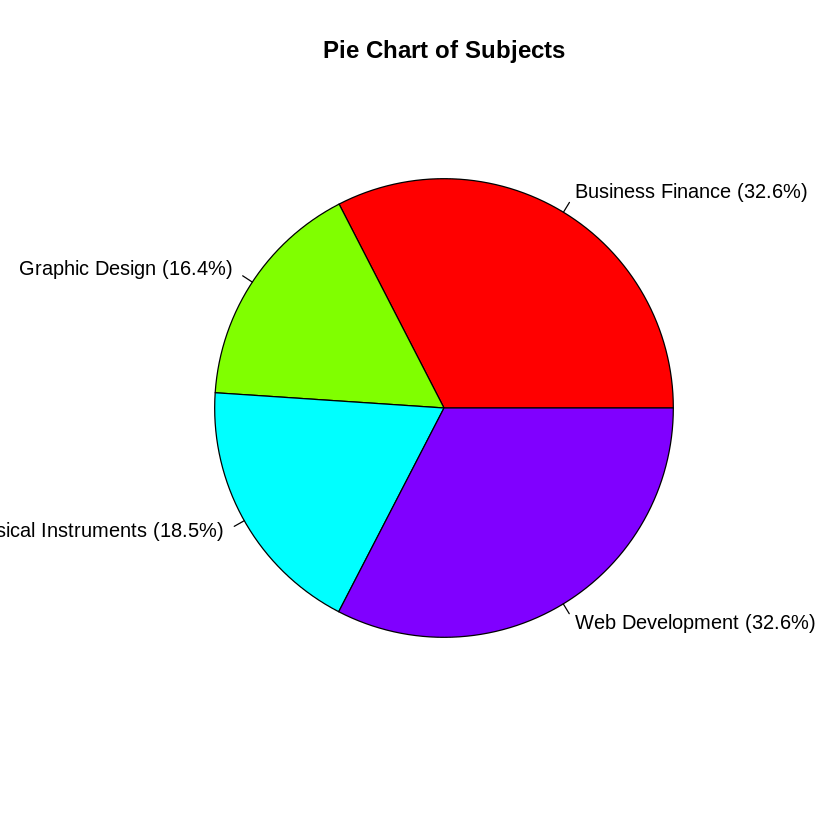

In [76]:
pie(counts, main = "Pie Chart of Subjects", col = rainbow(length(counts)), labels = paste0(names(counts), " (", round(counts / sum(counts) * 100, 1), "%)"))

####2) Which subjects has the maximum number of courses.

In [77]:
value_counts <- table(data$subject)
print(value_counts)


   Business Finance      Graphic Design Musical Instruments     Web Development 
               1199                 603                 680                1200 


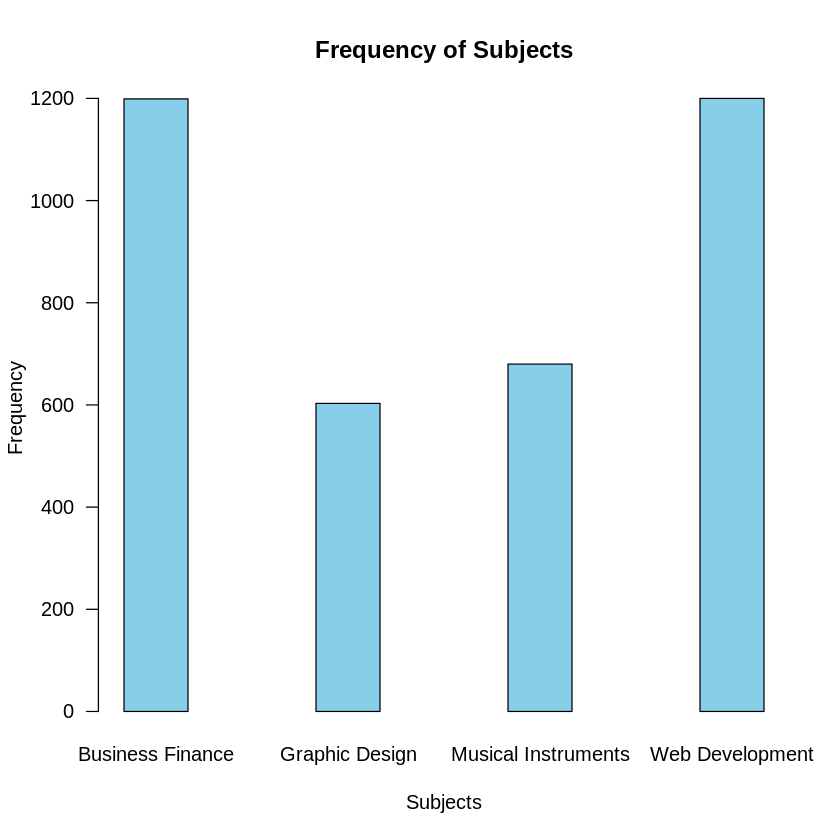

In [78]:
barplot(value_counts,
        main = "Frequency of Subjects",
        col = "skyblue",
        xlab = "Subjects",
        ylab = "Frequency",
        space = 2,
        las = 1)

####3) Show all the courses which are Free of Cost.

In [79]:
free_courses <- subset(data, is_paid == FALSE)  # Filter free courses
print(free_courses)  # Display all free courses


     course_id
42      286070
50      696630
58      955914
68      270976
75     1214144
77      421546
114     773650
126      48841
137      99324
142     198690
162     733878
176     723818
232     217978
281    1121650
294    1102962
297    1127988
299     808622
303     511934
312     692176
320     896742
367     829616
380     309820
385    1249378
434    1209694
439     857270
463     961630
465      21386
471     364716
472     205810
474     779000
479     934614
483     288854
487     465870
497    1072156
499     249950
502     501960
507     414246
509     774174
511      49798
522     787686
542     806638
562     708578
582     828254
590     283780
598     188692
616    1246622
619    1201054
633     954948
641     173548
653     575644
654     155640
684    1261122
685    1185535
688     369726
706     809216
752    1084894
771     884946
777      59014
789     196620
796    1166070
821    1050632
823    1090870
830    1268616
837     902300
850     777444
866     78

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


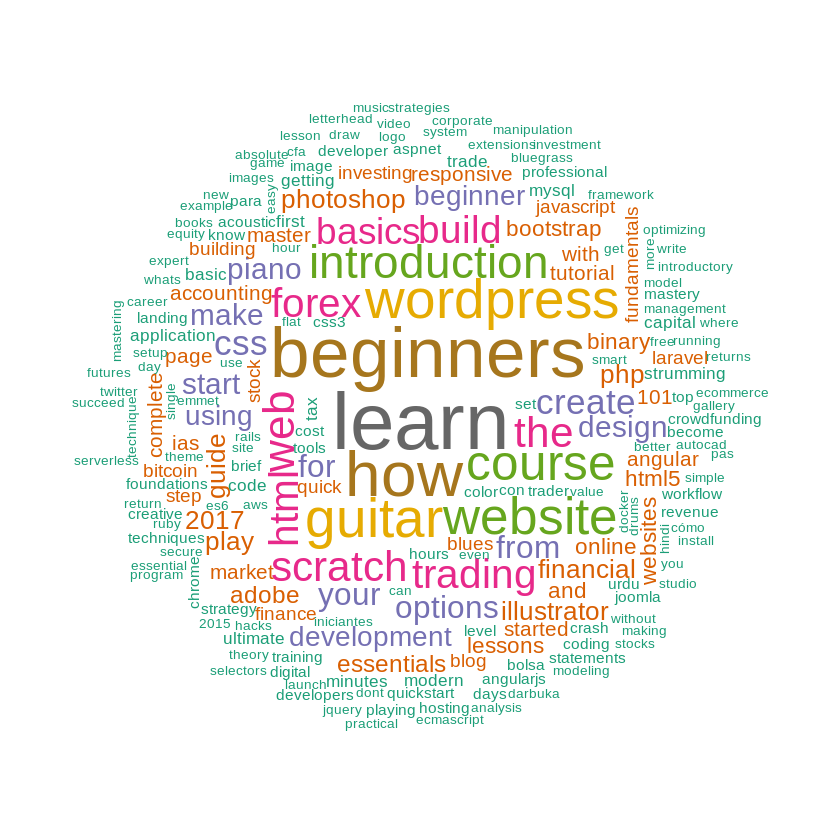

In [80]:
library(wordcloud)

wordcloud(words = free_courses$course_title,
          min.freq = 2,
          random.order = FALSE,
          colors = brewer.pal(8, "Dark2"))


Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
“transformation drops documents”


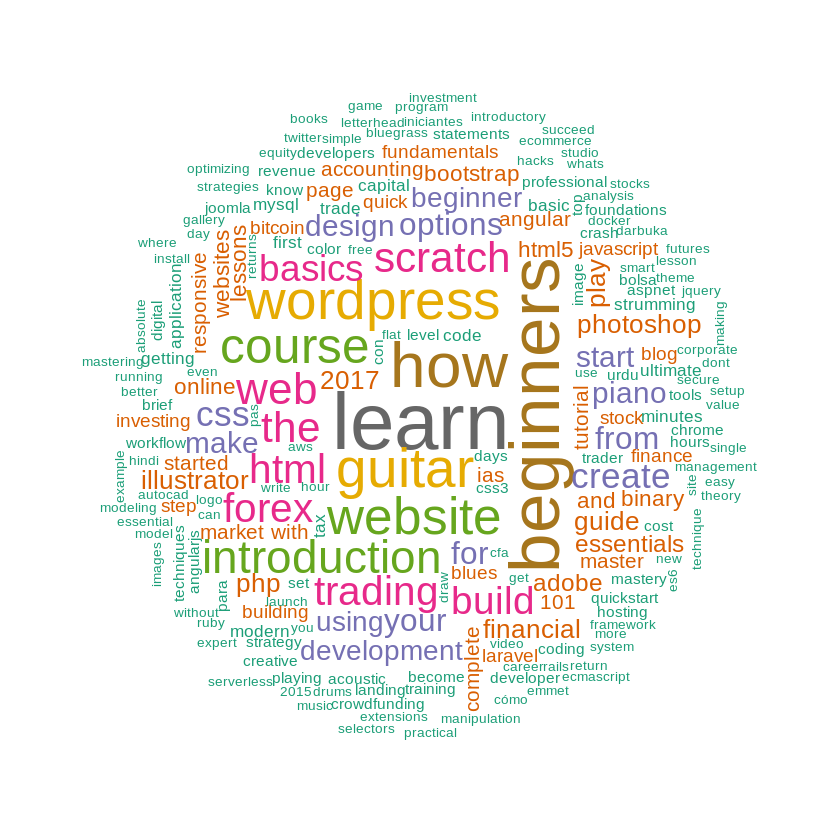

In [81]:
wordcloud(words = free_courses$course_title,
          min.freq = 2,
          random.order = FALSE,
          colors = brewer.pal(8, "Dark2"))


####4) Which are Top 10 Best Selling Courses ?

In [82]:
# Assuming "df" is meant to be "data"
top_courses <- data %>%  # Change df to data
  arrange(desc(num_subscribers)) %>%
  select(course_title, num_subscribers) %>%
  head(10)

In [83]:
print(top_courses)

                                                 course_title num_subscribers
1                        Learn HTML5 Programming From Scratch          268923
2                              Coding for Entrepreneurs Basic          161029
3                                  The Web Developer Bootcamp          121584
4      Build Your First Website in 1 Week with HTML5 and CSS3          120291
5                       The Complete Web Developer Course 2.0          114512
6                       Free Beginner Electric Guitar Lessons          101154
7    Web Design for Web Developers: Build Beautiful Websites!           98867
8                      Learn Javascript & JQuery From Scratch           84897
9  Practical PHP: Master the Basics and Code Dynamic Websites           83737
10                  JavaScript: Understanding the Weird Parts           79612


In [89]:
total_subscribers <- sum(top_courses$num_subscribers)
top_courses <- top_courses %>%
  mutate(percentage = (num_subscribers / total_subscribers) * 100)

# Create a pie chart with percentage labels
pie_chart <- ggplot(top_courses, aes(x = "", y = percentage, fill = course_title)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_stack(vjust = 0.5), size = 5) +
  labs(title = "Top Selling Courses (Percentage)", fill = "Course Title") +
  theme_minimal() +
  theme(plot.title = element_text(size = 20), legend.text = element_text(size = 12), legend.title = element_text(size = 14))

# Increase plot size
options(repr.plot.width = 10, repr.plot.height = 10)


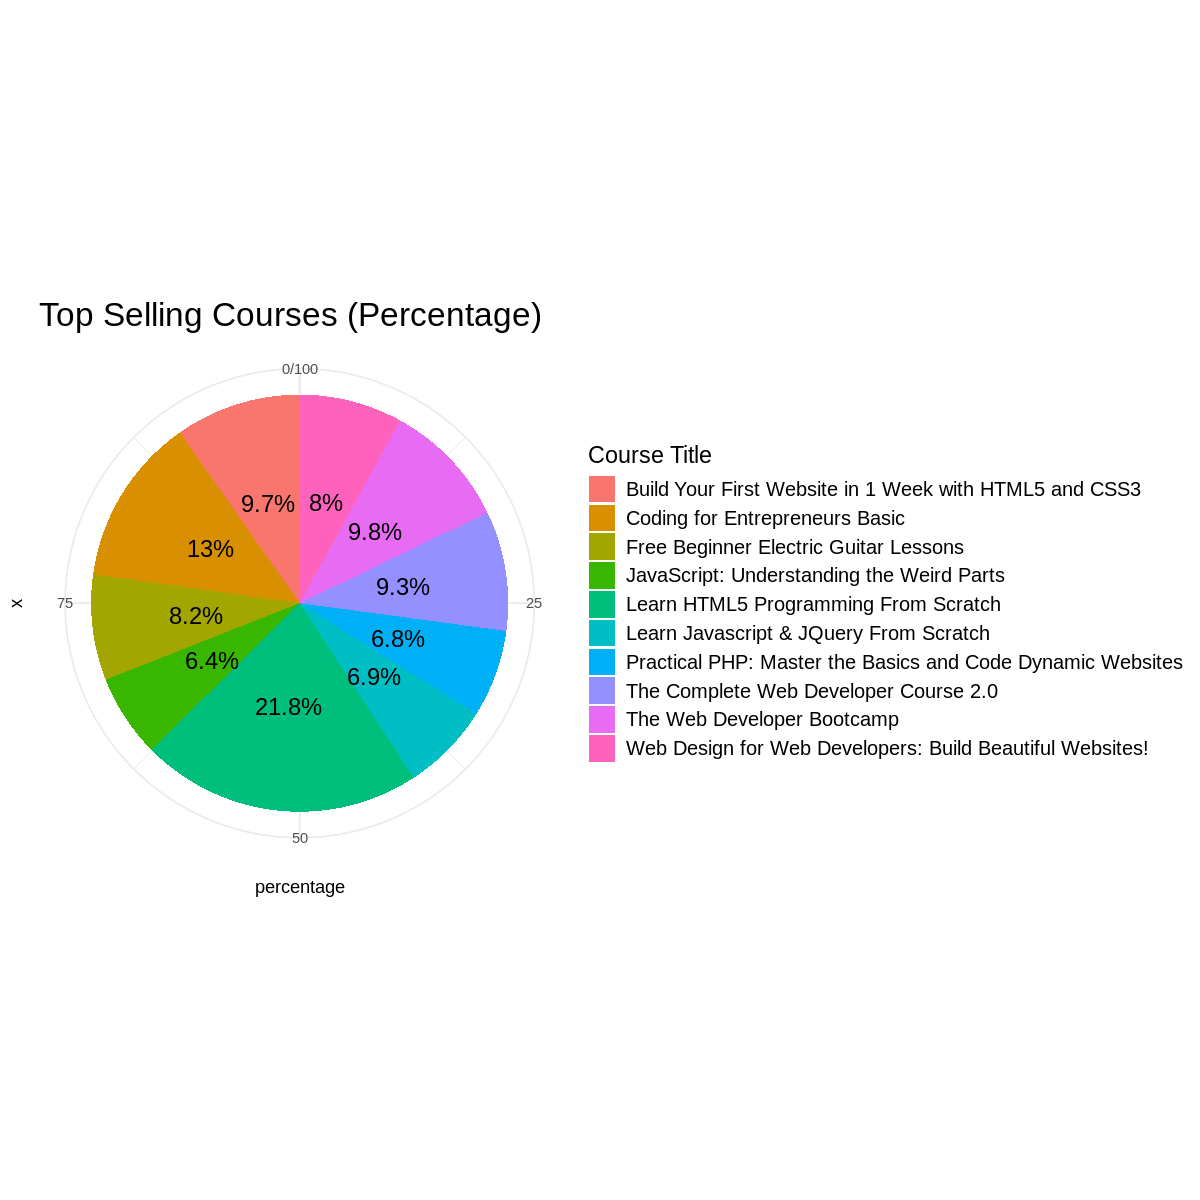

In [90]:
print(pie_chart)

####5) Show all courses of Graphic Design where the price is below 100

In [93]:
subset(data, subject == "Graphic Design" & as.numeric(price) < 100)

Warning message in eval(e, x, parent.frame()):
“NAs introduced by coercion”


,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
,<int>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
9,206592,:::Beginners Guide To Creating Amazing Images with Canva:::,TRUE,25,72,5,17,Beginner Level,1 hour,2014-04-29T19:50:31Z,Graphic Design
21,1165268,15 Motion Graphic Elements in After Effect (Series 2),TRUE,30,8,0,20,Intermediate Level,3 hours,2017-04-11T04:27:34Z,Graphic Design
36,1164876,3DS MAX - Learn 3Ds MAX tutorial for Beginners in Urdu Hindi,TRUE,20,785,2,29,All Levels,4.5 hours,2017-04-18T16:45:59Z,Graphic Design
40,599652,48 Logo Designs and Techniques,TRUE,20,113,9,48,All Levels,9 hours,2015-09-15T00:23:14Z,Graphic Design
53,794036,8 Stunden professionelles Cinema 4D Training,TRUE,50,18,1,38,All Levels,8.5 hours,2016-03-22T20:51:28Z,Graphic Design
59,435626,A Beginners Guide to creating Vector Graphics With Photoshop,TRUE,20,1207,5,19,Beginner Level,2 hours,2015-04-05T18:48:19Z,Graphic Design
74,223884,初めてのiDraw入門,TRUE,20,13,0,14,All Levels,1.5 hours,2014-06-12T05:08:01Z,Graphic Design
76,766320,สร้างงานกราฟฟิคแอพพลิเคชั่นมือถือด้วย Adobe Illustrator,TRUE,20,25,5,30,Beginner Level,9.5 hours,2016-02-25T17:18:41Z,Graphic Design
82,814200,商業好設計-Illustrator個性商品設計,TRUE,20,20,3,5,Beginner Level,41 mins,2016-04-26T17:26:44Z,Graphic Design


In [96]:
graphic_design_courses <- data %>%
  filter(subject == "Graphic Design" & as.numeric(price) < 100) %>%
  select(course_id, course_title, price)

# Display the table
head(graphic_design_courses)


Warning message:
“There was 1 warning in `filter()`.
ℹ In argument: `subject == "Graphic Design" & as.numeric(price) < 100`.
Caused by warning:
! NAs introduced by coercion”


,course_id,course_title,price
,<int>,<chr>,<chr>
1,206592,:::Beginners Guide To Creating Amazing Images with Canva:::,25
2,1165268,15 Motion Graphic Elements in After Effect (Series 2),30
3,1164876,3DS MAX - Learn 3Ds MAX tutorial for Beginners in Urdu Hindi,20
4,599652,48 Logo Designs and Techniques,20
5,794036,8 Stunden professionelles Cinema 4D Training,50
6,435626,A Beginners Guide to creating Vector Graphics With Photoshop,20
